# ABOUT PROJECT : AUTISM CLASSIFICATION
THE FIELD OF QUANTUM COMPUTING IS QUITE FASCINATING ,WITH THE INVENTION OF ALGORITHMS THAT DEPEND ON SUPERPOSITION AND THE IDEA OF 
QUBITS.WE CAN USE THESE ALGORITHMS TO FURTHER O MEDICINE RESEARCH .QUANTUM MACHINE LEARNING IS GOOD IN PATTERN RECOGNITION
AND SO FOR THIS PROJECT I WILL INCORPORATE  TO SOLVE THE PROBLEM OF DIAGONISING AUTISM.
THE IDEA IS TO CREATE A PARAMETIZED CIRCUIT AND ENCODE CLASSICAL DATA IN THE QUANTUM STATE SPACE.



In [1]:
# import some dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import torch
from torch import nn
import torch.nn.functional as F
# Quantum Machine Learning
import qiskit
import qiskit_machine_learning
from qiskit.circuit.library import RealAmplitudes,ZZFeatureMap
from qiskit.algorithms.optimizers import SPSA
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_machine_learning.algorithms.classifiers import VQC


In [2]:
# read in the data 
df = pd.read_csv("C:\\Datasets\\Autism\\autism_screening.csv")
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
df.shape

(704, 21)

In [4]:
df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD           object
dtype: object

In [5]:
df.isnull().sum() # return all the columns with null values

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [6]:
df['ethnicity'].value_counts().head() # I did this to first understand how many rows have a question mark 

White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
Name: ethnicity, dtype: int64

In [7]:
df['ethnicity'] = df['ethnicity'].replace({"?":"NotListed"})

In [8]:
df['ethnicity'].value_counts().head() # I replaced  the question mark 

White-European     233
Asian              123
NotListed           95
Middle Eastern      92
Black               43
Name: ethnicity, dtype: int64

In [9]:
df['relation'] = df['relation'].replace({"?":"NotListed"}) # same procedure to eliminate the question mark

In [10]:
# age had two null values,I replaced that using the mean value
df['age'] = df['age'].fillna(df['age'].mean())

In [11]:
# Create a function that returns the frequent items in our columns
def frequent_items(column,df=df):
    """This function return the top 5 most appearing values in a column ,It also indicates the highest
    appearing values"""
    return print(f"The most appearing in {column} in order of appearance /n {df[column].value_counts().head()}")

In [12]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [13]:
for column in df.columns :
    if column in ['age', 'gender','ethnicity', 'jundice', 'austim', 'contry_of_res','result', 'age_desc', 'relation', 'Class/ASD']:
        frequent_items(column=column)

The most appearing in age in order of appearance /n 21.0    49
20.0    46
23.0    37
22.0    37
19.0    35
Name: age, dtype: int64
The most appearing in gender in order of appearance /n m    367
f    337
Name: gender, dtype: int64
The most appearing in ethnicity in order of appearance /n White-European     233
Asian              123
NotListed           95
Middle Eastern      92
Black               43
Name: ethnicity, dtype: int64
The most appearing in jundice in order of appearance /n no     635
yes     69
Name: jundice, dtype: int64
The most appearing in austim in order of appearance /n no     613
yes     91
Name: austim, dtype: int64
The most appearing in contry_of_res in order of appearance /n United States           113
United Arab Emirates     82
New Zealand              81
India                    81
United Kingdom           77
Name: contry_of_res, dtype: int64
The most appearing in result in order of appearance /n 4.0    131
3.0    110
5.0     83
2.0     74
6.0     70
Name: resu

# DATA EXPLORATION AND VISUALIZATION

In [14]:
# To visualize some of the categorical data ,I will use the countplot from the seaborn library and so I will create a function 
#that returns the visualization.Also a histogram plot will be handy for univariate  continous data

def draw_countplot(column,hue=None,df=df):
    fig=plt.figure(figsize=(20,8))
    sns.countplot(x=column,data=df,hue=hue)
    plt.xlabel(column)
    plt.ylabel("Total Number")
    plt.title(f"The Distribution of {column}")
    plt.show()
def draw_histogram(column,hue=None,df=df):
    fig=plt.figure(figsize=(20,8))
    sns.histplot(x=column,data=df,hue=hue)
    plt.xlabel(column)
    plt.ylabel("Total Number")
    plt.title(f"The Distribution of {column}")
    plt.show() 

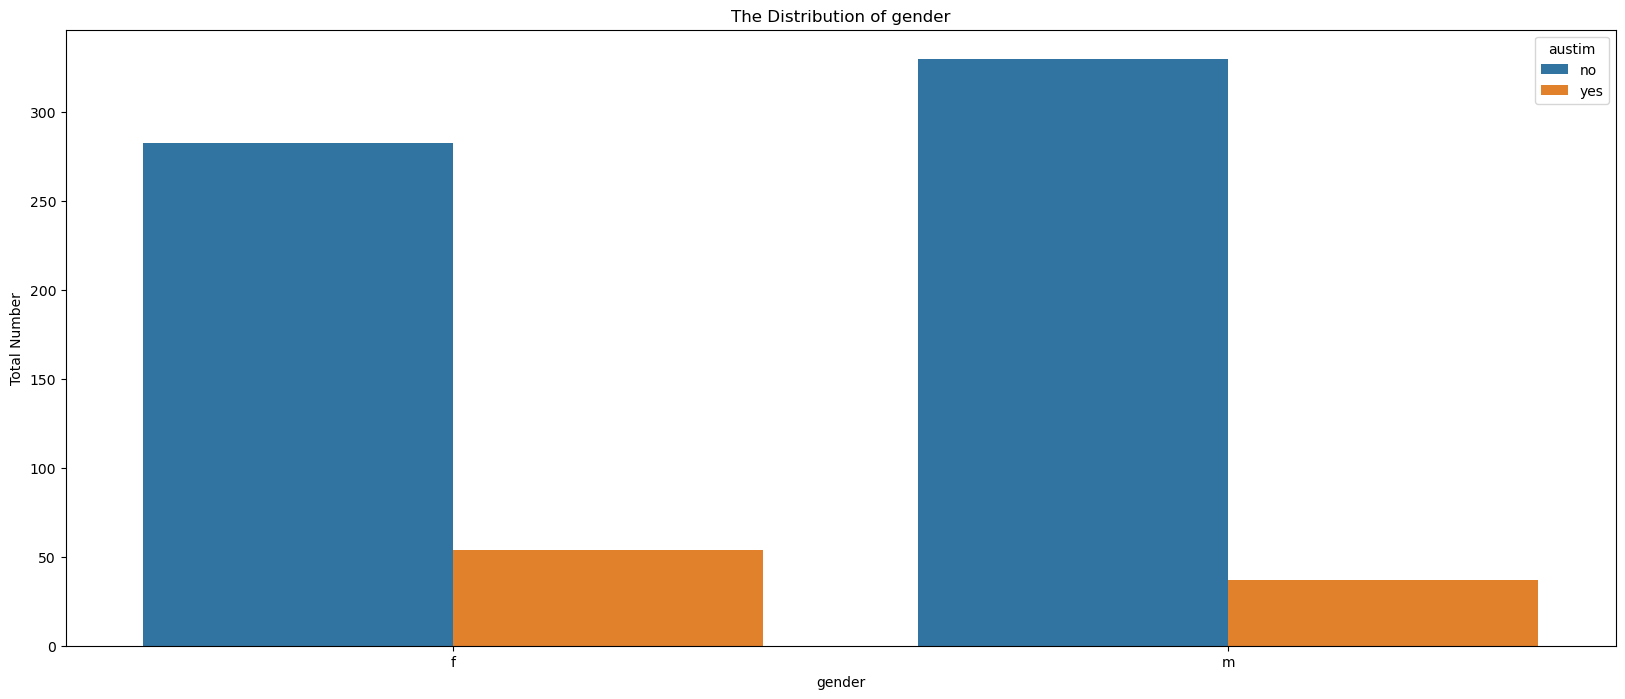

In [15]:
# 1. Which gender dominates the Autism disorder
draw_countplot("gender",hue='austim') # A lot of females have Autistic syndrome

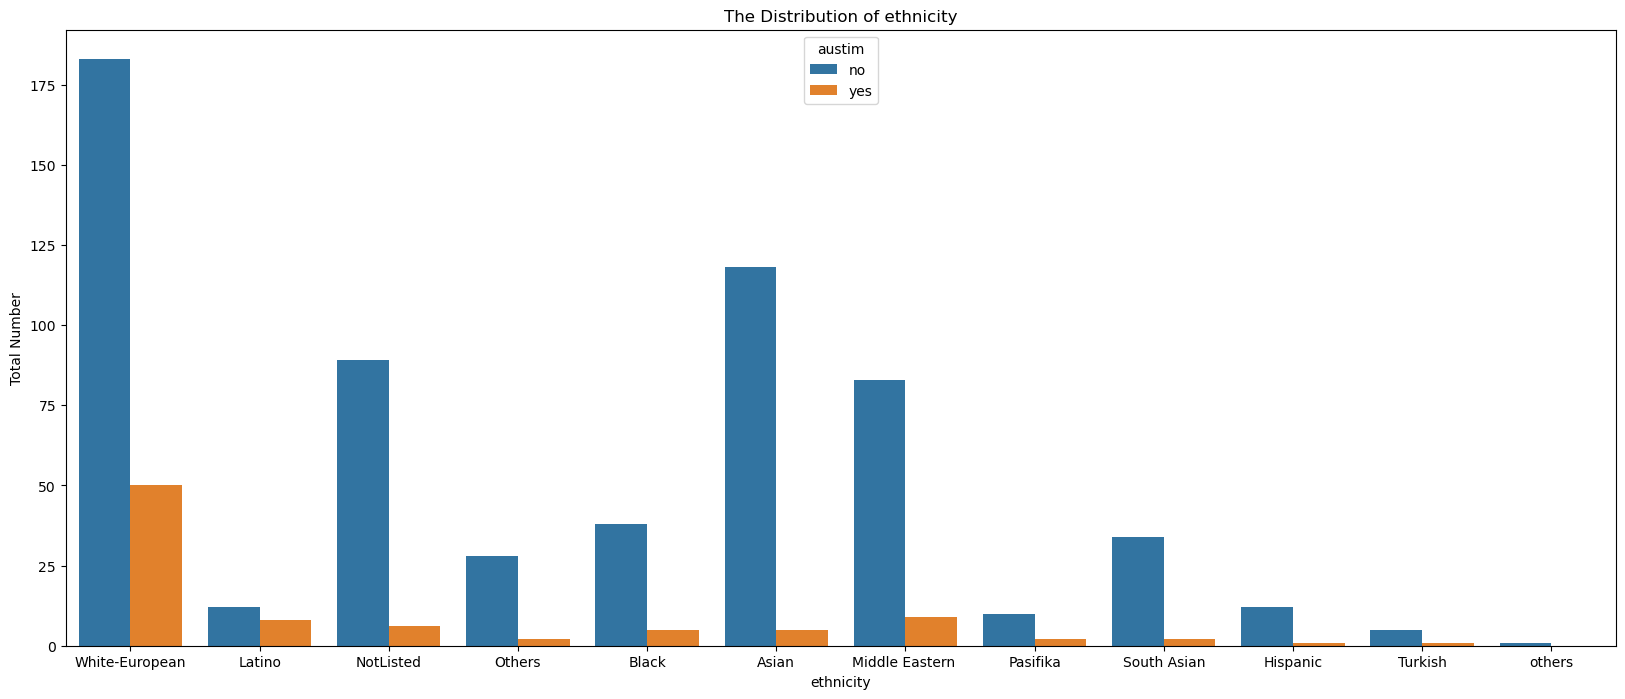

In [16]:
# 2 . Which ethnicity has more Autism cases ?
draw_countplot("ethnicity",hue="austim") # White Europeans dominate with Autism

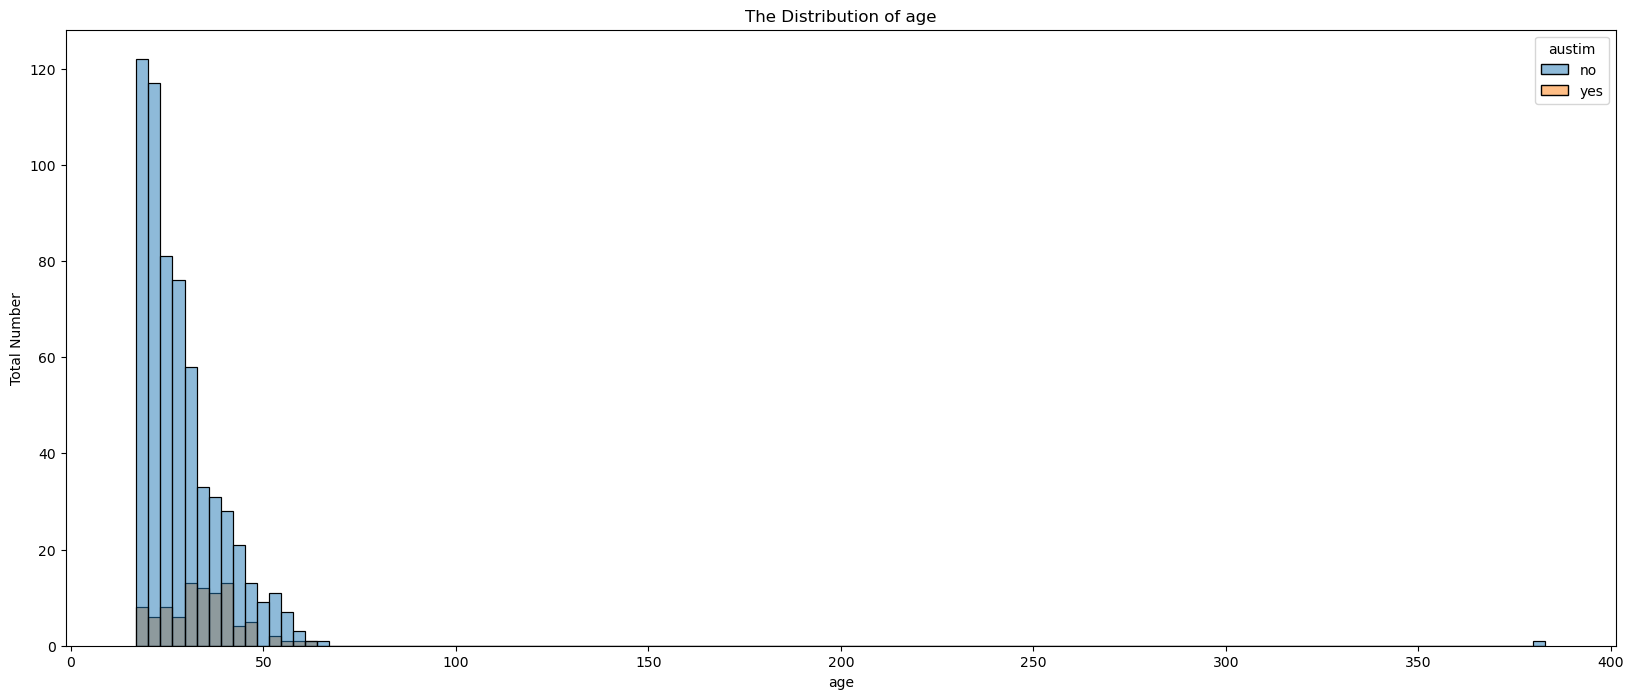

In [17]:
# 3 Which age group has the most cases of Autism?
draw_histogram("age",hue='austim') # A majority of the confirmed cases are aged 30 

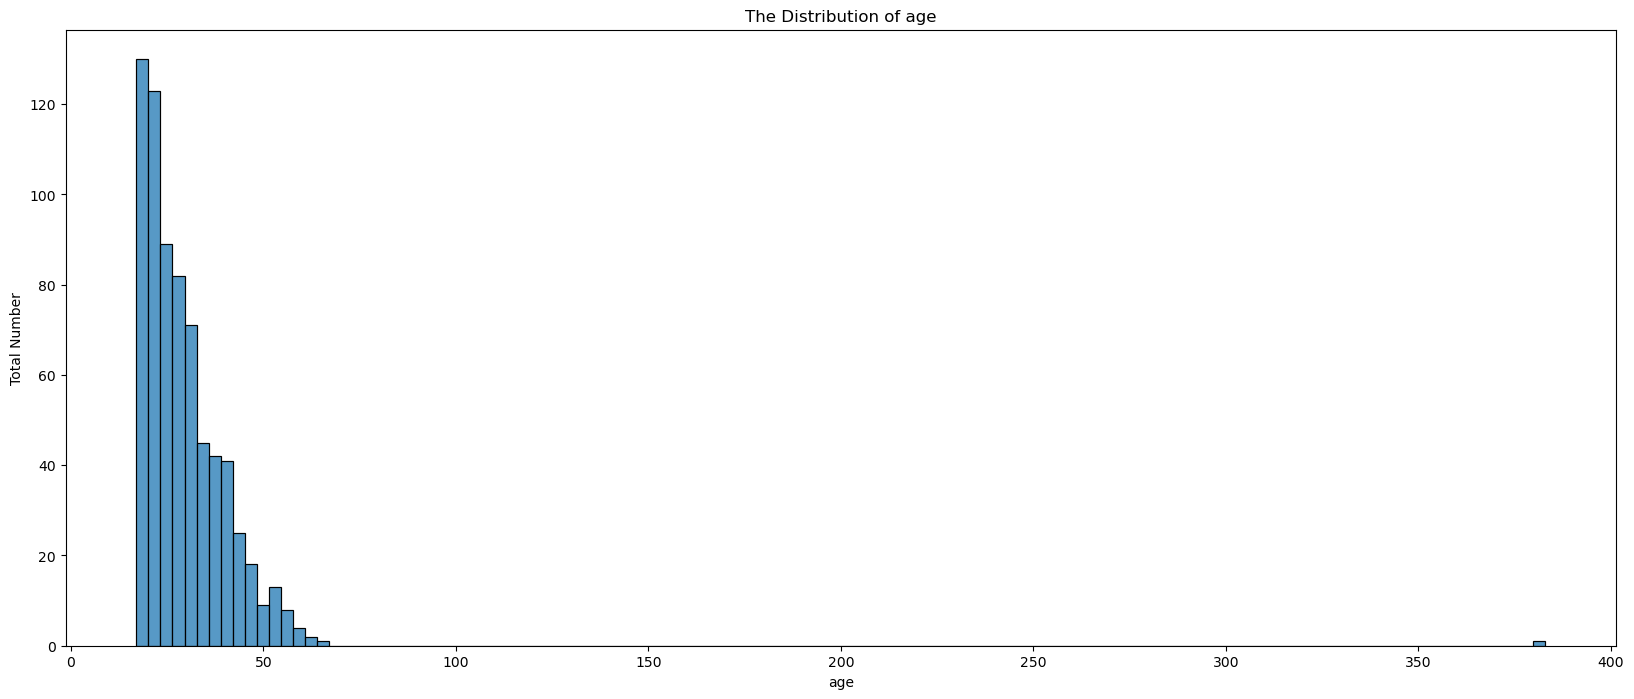

In [18]:
# 4.Which age dominates the survey?
draw_histogram("age")

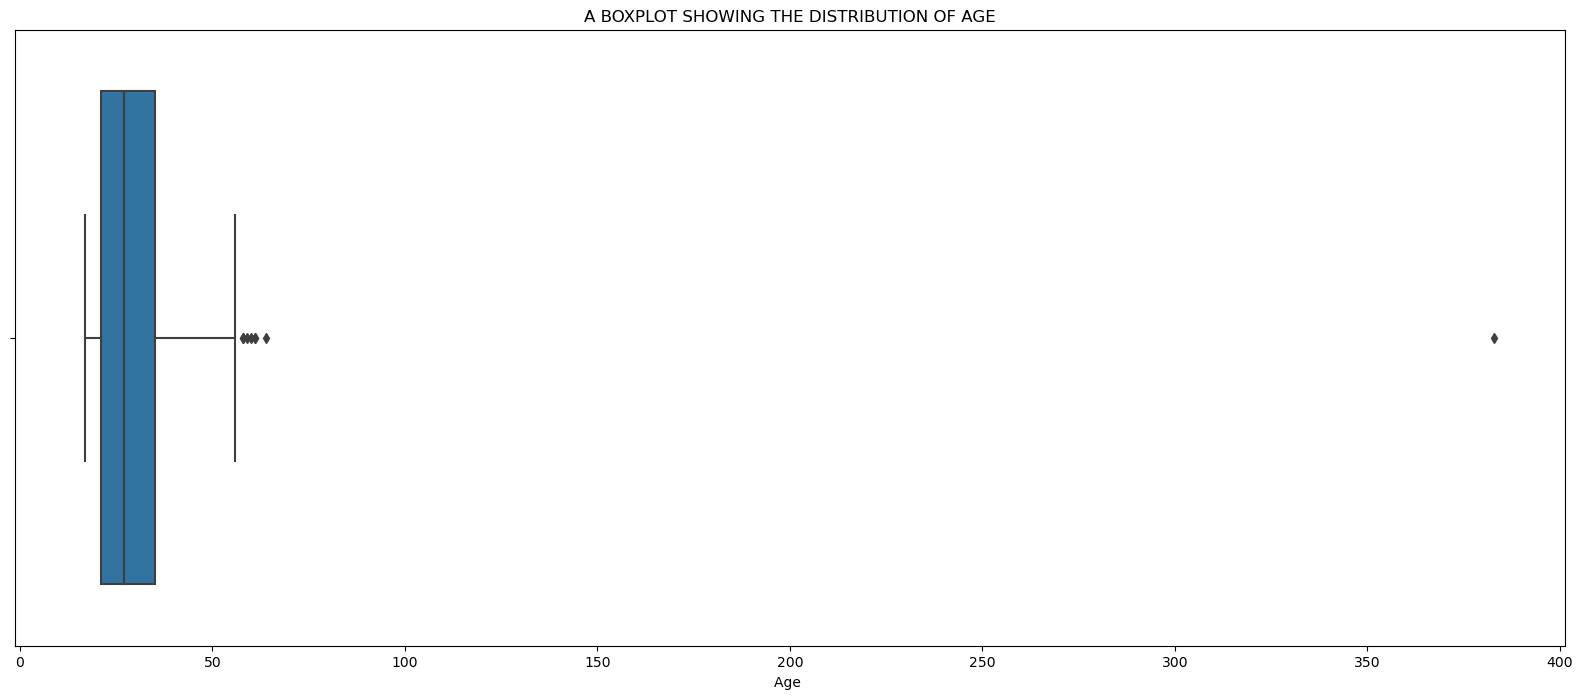

In [19]:
plt.figure(figsize=(20,8))
sns.boxplot(x="age",data=df)
plt.xlabel("Age ")
plt.title("A BOXPLOT SHOWING THE DISTRIBUTION OF AGE")
plt.show()

In [20]:
# TO ANALYZE AND VISUALIZE Categorical data I will be forced to convert them into continous data ,using label encoder
lbl_encoder = {}
categorical_columns = ['age', 'gender','ethnicity', 'jundice', 'austim', 'contry_of_res'
                       ,'result', 'age_desc', 'relation', 'Class/ASD','used_app_before']
for columns in categorical_columns:
    lbl_encoder = LabelEncoder()
    df[columns] = lbl_encoder.fit_transform(df[columns])

In [21]:
df.drop(['age_desc'],axis=1,inplace=True)

In [22]:
df.head() # Now we have no categorical columns

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,9,0,10,0,0,64,0,6,5,0
1,1,1,0,1,0,0,0,1,0,1,7,1,3,0,1,13,0,5,5,0
2,1,1,0,1,1,0,1,1,1,1,10,1,3,1,1,56,0,8,3,1
3,1,1,0,1,0,0,1,1,0,1,19,0,10,0,1,64,0,6,5,0
4,1,0,0,0,0,0,0,1,0,0,24,0,5,0,0,22,0,2,1,0


In [23]:
# Checking for correlation between the columns
correlation = df.corr()
correlation

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.010172,-0.075011,0.107554,-0.019077,0.097630,0.024271,-0.040620,0.397454,0.104736,0.297628
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.078517,-0.047393,0.172701,0.112615,0.074555,0.142462,-0.009645,0.392540,0.057278,0.311382
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.092008,0.000795,0.170544,0.061760,0.113697,0.054094,0.055320,0.552356,0.126816,0.441074
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.100970,-0.056508,0.206303,0.064918,0.193820,0.046927,0.023071,0.586025,0.112273,0.469945
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.006067,-0.039688,0.071006,0.034378,0.090009,-0.019358,0.000374,0.639706,0.152599,0.537004
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.088029,-0.083615,0.176092,0.078366,0.114048,-0.010930,0.087378,0.630012,0.078927,0.592091
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,-0.004196,0.061900,0.025271,0.030850,-0.008610,-0.017262,-0.022505,0.454848,0.067205,0.351429
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,-0.072787,0.064127,-0.012528,0.012101,0.034845,-0.044392,-0.041155,0.324020,0.103845,0.237161
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.124857,0.006940,0.131504,0.057717,0.167644,-0.073850,0.049567,0.661205,0.062633,0.635576
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.043827,-0.055246,0.120097,0.052201,0.117969,0.025746,-0.041860,0.537205,0.130232,0.385917


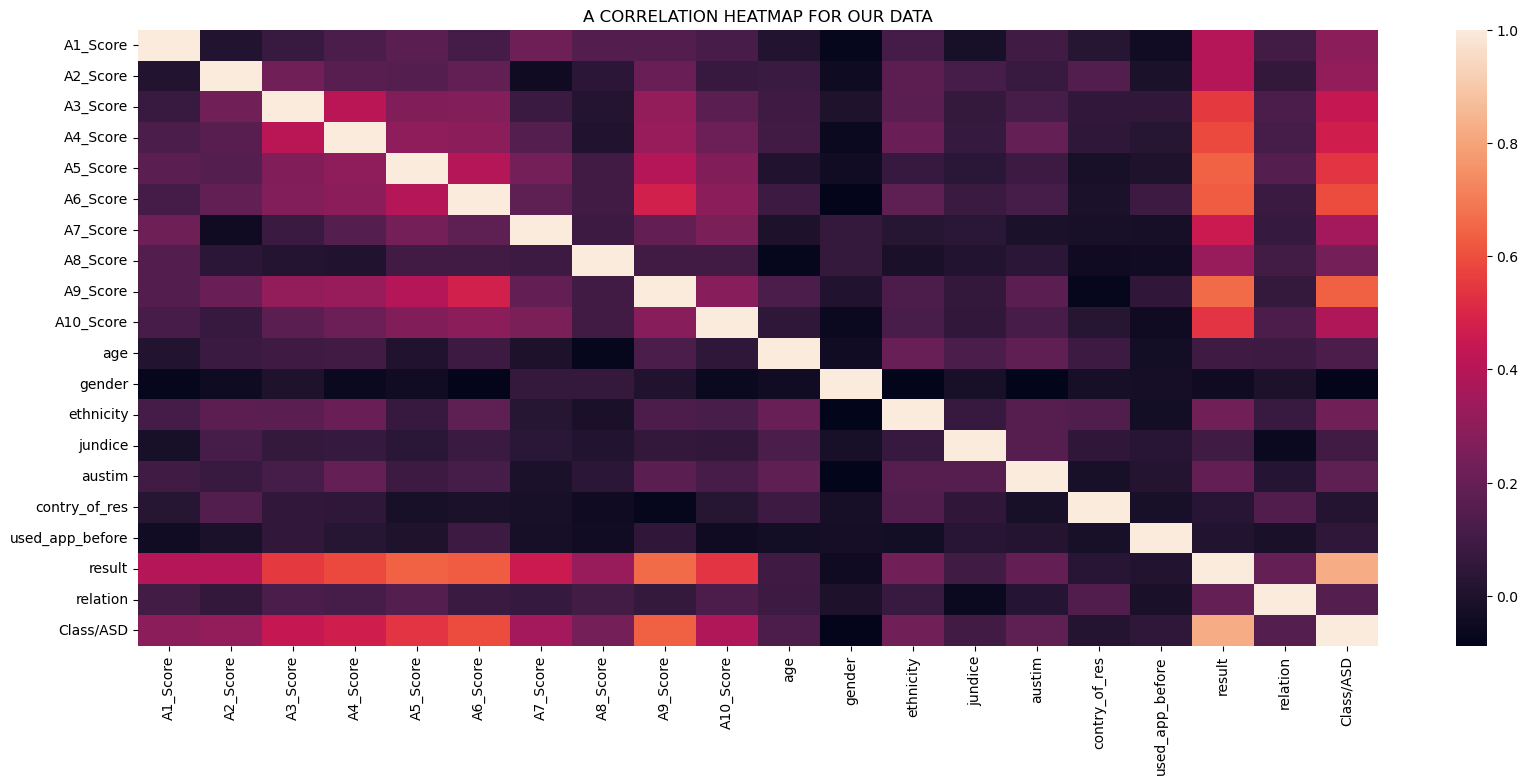

In [24]:
# Visualize it in a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(correlation)
plt.title("A CORRELATION HEATMAP FOR OUR DATA")
plt.show()

# FINAL PREPROCESSING 

In [25]:
# here i WILL SELECT the  target features 
X = df.drop(['contry_of_res','used_app_before','austim'],axis=1)
y = df['austim']
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2) # splitting data into training and test


# CLASSICAL MACHINE LEARNING : PART ONE - ENSEMBLE AND LOGISTIC REGRESSION
In This part I will create train and ensemble model and evaluate it.Since the Outcome is binary I will experiment with
a Logistic Regression model

In [26]:
from sklearn.metrics import classification_report,mean_squared_error
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rf_predictions = rfc.predict(X_test)
print(f"Classification Report {classification_report(y_test,rf_predictions)}")

Classification Report               precision    recall  f1-score   support

           0       0.90      0.95      0.93       128
           1       0.00      0.00      0.00        13

    accuracy                           0.87       141
   macro avg       0.45      0.48      0.46       141
weighted avg       0.82      0.87      0.84       141



In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions = rfc.predict(X_test)
print(f"MeanSquared Error {mean_squared_error(y_test,lr_predictions)}")

MeanSquared Error 0.1347517730496454


# CLASSICAL MACHINE LEARNING : PART TWO - DEEP LEARNING 
In This part I will build a deep learning model using Pytorch framework.

In [28]:
# Ill convert the arrays into tensors
X_train_tensor = torch.from_numpy(X_train).type(torch.Tensor)
X_test_tensor = torch.from_numpy(X_test).type(torch.Tensor)
y_train_tensor = torch.from_numpy(y_train.values.reshape(-1,1)).type(torch.Tensor)
y_test_tensor = torch.from_numpy(y_test.values.reshape(-1,1)).type(torch.Tensor)

In [29]:
X_train_tensor.shape

torch.Size([563, 17])

In [30]:
y_train_tensor.shape

torch.Size([563, 1])

In [31]:
# Autism Predictor model
class AutismPredictor(nn.Module):
    def __init__(self,input_dim=17,hidden_dim=68,output_dim=1,p=0.3):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.linear1 = nn.Linear(input_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,hidden_dim)
        self.fc = nn.Linear(hidden_dim,output_dim)
        self.dropout = nn.Dropout(p)
    def forward(self,x:torch.tensor):
        x = self.dropout(self.linear1(x))
        x = self.linear2(x)
        x = self.fc(x)
        return x
        

In [32]:
model = AutismPredictor()

In [33]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)
criterion = nn.BCEWithLogitsLoss()

In [34]:
def training_and_testing(epochs,X_train=X_train_tensor,y_train = y_train_tensor,X_test = X_test_tensor,y_test = y_test_tensor,model=model):
    for epoch in range(epochs):
        model.train()
        y_pred = model.forward(X_train)
        loss = criterion(y_pred,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            model.eval()
            y_pred = model.forward(X_test)
            testing_loss = criterion(y_pred,y_test)
            print(f"Epoch:{epoch}|Training Loss{loss}|Testing Loss{testing_loss}")

In [35]:
training_and_testing(epochs=20)

Epoch:0|Training Loss0.6821370124816895|Testing Loss0.6679916977882385
Epoch:1|Training Loss0.6662833094596863|Testing Loss0.6567949056625366
Epoch:2|Training Loss0.661869466304779|Testing Loss0.6461134552955627
Epoch:3|Training Loss0.6494418978691101|Testing Loss0.6359957456588745
Epoch:4|Training Loss0.6415733695030212|Testing Loss0.6262692213058472
Epoch:5|Training Loss0.6340931057929993|Testing Loss0.6167495846748352
Epoch:6|Training Loss0.6257568001747131|Testing Loss0.6076076626777649
Epoch:7|Training Loss0.608900785446167|Testing Loss0.5988345742225647
Epoch:8|Training Loss0.6056392788887024|Testing Loss0.5904232859611511
Epoch:9|Training Loss0.5978325009346008|Testing Loss0.58230060338974
Epoch:10|Training Loss0.5907389521598816|Testing Loss0.5743991732597351
Epoch:11|Training Loss0.5823201537132263|Testing Loss0.5668326616287231
Epoch:12|Training Loss0.5780519843101501|Testing Loss0.5594479441642761
Epoch:13|Training Loss0.5698044896125793|Testing Loss0.5523696541786194
Epoch:

In [36]:
# Lets see some of the predictions by our deep learning model
torch.manual_seed(18102023)
with torch.inference_mode():
    predictions = model.forward(X_test_tensor[:10])
    print(f"The first 10 predictions are {predictions}")

The first 10 predictions are tensor([[-0.2564],
        [-0.4587],
        [-0.7499],
        [-0.3950],
        [-0.4635],
        [-0.8304],
        [-0.3556],
        [-0.9397],
        [-0.3029],
        [-0.3366]])


In [37]:
X_train.shape[1]

17

# QUANTUM MACHINE LEARNING

In [59]:
# Since this is experimental, I will use part of my data ,I will the dimension to around 4 ,using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X = df.drop(['contry_of_res','used_app_before','austim'],axis=1).head(200)
y = df['austim'].head(200)
X = StandardScaler().fit_transform(X)

X_quantum = pca.fit_transform(X)
y_quantum = y
X_train_q,X_test_q,y_train_q,y_test_q = train_test_split(X_quantum,y_quantum,random_state=42,test_size=0.2)


In [60]:
X_train_q.shape

(160, 4)

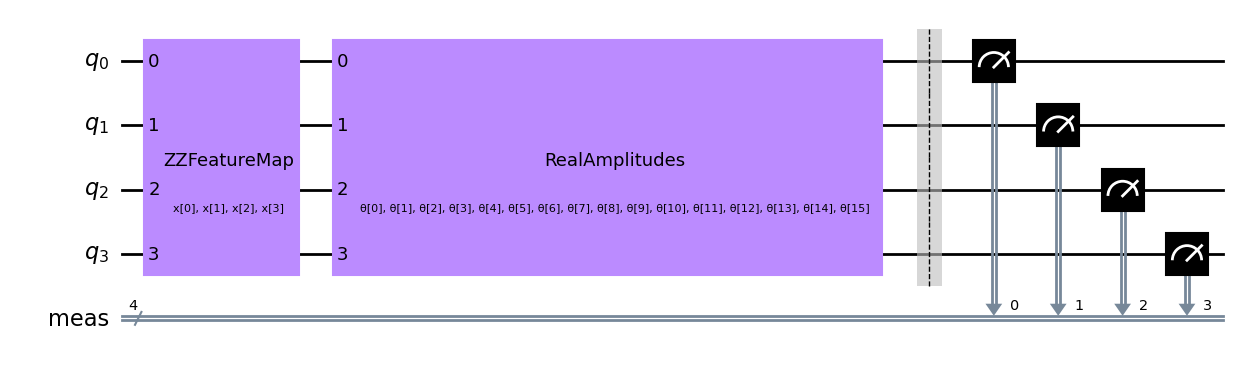

In [61]:
# Here I am creating a parametrized quantum circuit and feeding in my classical data where they will be transformed
qc = QuantumCircuit(4)
feature_map = ZZFeatureMap(4)
ansatz = RealAmplitudes(4)
ansatz.measure_all()
qc.compose(feature_map,inplace=True)
qc.compose(ansatz,inplace=True)
qc.decompose()
qc.draw("mpl")

In [62]:
# The VQC algorithm requires us to one hot encode our variables and so I will utilize the One Hot Encoder algorithm from sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_oh = encoder.fit_transform(y_train_q.values.reshape(-1,1))
y_test_oh =  encoder.fit_transform(y_test_q.values.reshape(-1,1))

In [63]:
# I will create an initial point for our weights,like the initial weights assigned to any Machine Learning model
initial_weights = np.random.random(ansatz.num_parameters)
initial_weights

array([0.50745978, 0.67764556, 0.09251989, 0.19374346, 0.08489132,
       0.30448487, 0.76613446, 0.09976319, 0.47086358, 0.9407321 ,
       0.38569199, 0.35014103, 0.45492304, 0.39851113, 0.82705445,
       0.10955388])

In [64]:
vqc = VQC(feature_map=feature_map,ansatz=ansatz,optimizer=SPSA(maxiter=30),initial_point=initial_weights)

In [ ]:
vqc.fit(X_train_q,y_train_oh)

In [4]:
accuracy_score = vqc.score(X_test_q,y_test_oh)
print (f"Accuracy Score for Our Quantum Model is {accuracy_score}")

Accuracy Score for Our Quantum Model is 0.87
